# 1. 코로나 데이터 확인

## 코로나 바이러스 데이터

- Case : 코로나 발생 케이스 정리            
case_id / province / city / group / infection_case / confirmed / latitude / longitude            
케이스 번호 / 지역 / 도시 / 집단감염여부 / 감염발생장소 / 확진자수 / 위도 / 경도


- PatientInfo : 코로나 환자 정보             
patient_id / sex / age / country / province / city / infection_case / infected_by / contact_number / symptom_onset_date / confirmed_date / released_date / deceased_date / state            
환자 번호 / 성별 / 나이 / 나라 / 시도 / 시군구 / 감염케이스 구분 / 전파여부? / 접촉자 수 / 증상시작일 / 확진일 / 완치일 / 사망일 / 상태


- Policy : 정책 정보                 
policy_id / country / type / gov_policy / detail / start_date / end_date            
정책 번호 / 국가 / 정책탕비 / 정책 내용 / 상세 내용 / 시작일 / 종료일


- Region : 코로나 발생지역 정보              
code / province / city / latitude / longitude / elementary_school_count / kindergarten_count / university_count / academy_ratio / elderly_population_ratio / elderly_alone_ratio / nursing_home_count            
번호 / 광역시도 / 시군구 / 위도 / 경도 / 초등학교 수 / 유치원 수 / 대학교 수 / 학생 비율? / 노인인구비율 / 독거노인비율 / 요양수


- SearchTrend : 코로나 검색 빈도?             
date / cold / flu pneumonia / coronavirus            
날짜 / 감기 / 독감 / 코로나

- SeoulFloating : 서울 코로나 확진자 정보          
date / hour / birth_year / sex / province / city / fp_num            
날짜 / 시간 / 출생년도 / 성별 / 광역시도 / 시군구 / 유동인구


- Time : 시간대별 감염자 정보               
date / time / test / negative / confirmed / released / deceased            
날짜 / 시간 / 검사수 / 음성 / 확진 / 완치 / 사망


- TimeAge : 시간 및 나이별 감염자 정보             
date / time / age / confirmed / deceased            
날짜 / 시간 / 나이 / 확진 / 사망


- TimeGender : 시간 및 성별 감염자 정보               
date / time / sex / confirmed / deceased            
날짜 / 시간 / 성별 / 확진 / 사망


- TimeProvince : 시간 및 지역별 감염자 정보           
date / time / province / confirmed / released / deceased            
날짜 / 시간 / 광역시도 / 확진 / 완치 / 사망


- Weather : 날씨 정보              
code / province / date / avg_temp / min_temp / max_temp / precipitation / max_wind_speed / most_wind_direction / avg_relative_humidity            
번호 / 광역시도 / 날짜 / 일일평균온도 /일일최저온도 / 일일최대온도 / 강수량 / 최대풍속 / 최빈풍향 / 습도

In [42]:
# 내가 담당한 자료
# Time / TimeProvince / Weather

In [43]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

In [44]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [45]:
pd.set_option('display.max_columns', 100) # 무한으로 하고 싶으면 None
pd.set_option('display.max_rows', 100)

In [46]:
os.listdir("./data/covid_19_dataset/")

['Case.csv',
 'PatientInfo.csv',
 'Policy.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

In [47]:
covid_df1 = pd.read_csv("./data/covid_19_dataset/Time.csv")


In [48]:
# 시간대별 감염자 정보
display(covid_df1.head(3))

# 날짜 / 시간 / 검사수 / 음성 / 확진 / 완치 / 사망

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0


In [49]:
# 필요한 시간대는 2019.12.01 ~ 2020.03.31
# 코로나 확진 시작은 2020.01.20 

covid_df1['date'] = pd.to_datetime(covid_df1['date'])
corona_data = covid_df1[covid_df1['date'] < '2020-06-01']
corona_data.drop("time", axis=1, inplace=True)

# 불필요한 컬럼 time, negative
# 확진, 완치, 사망은 누적이 기준이다.
# 생각보다 test와 negative의 차이가 크지 않다.
# test를 불안의 정도로 볼 수 있을까?
# 이전 행을 빼면서 당일 확진자 / 당일 완치자 / 당일 사망자 컬럼을 파생변수로 만들 수 있다.

In [50]:
corona_data.head()

,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0
2,2020-01-22,4,3,1,0,0
3,2020-01-23,22,21,1,0,0
4,2020-01-24,27,25,2,0,0


In [51]:
per_day_test = [0]
per_day_confirmed = [0]
per_day_released = [0]
per_day_deceased = [0]

for x in range(len(corona_data)-1) :
    per_day_test.append(corona_data['test'].iloc[x+1] - corona_data['test'].iloc[x])
    per_day_confirmed.append(corona_data['confirmed'].iloc[x+1] - corona_data['confirmed'].iloc[x])
    per_day_released.append(corona_data['released'].iloc[x+1] - corona_data['released'].iloc[x])
    per_day_deceased.append(corona_data['deceased'].iloc[x+1] - corona_data['deceased'].iloc[x])
    
corona_data['per_day_test'] = per_day_test
corona_data['per_day_confirmed'] = per_day_confirmed
corona_data['per_day_released'] = per_day_released
corona_data['per_day_deceased'] = per_day_deceased

corona_data

,date,test,negative,confirmed,released,deceased,per_day_test,per_day_confirmed,per_day_released,per_day_deceased
0,2020-01-20,1,0,1,0,0,0,0,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...
128,2020-05-27,852876,820550,11265,10295,269,13401,40,20,0
129,2020-05-28,868666,834952,11344,10340,269,15790,79,45,0
130,2020-05-29,885120,849161,11402,10363,269,16454,58,23,0
131,2020-05-30,902901,865162,11441,10398,269,17781,39,35,0


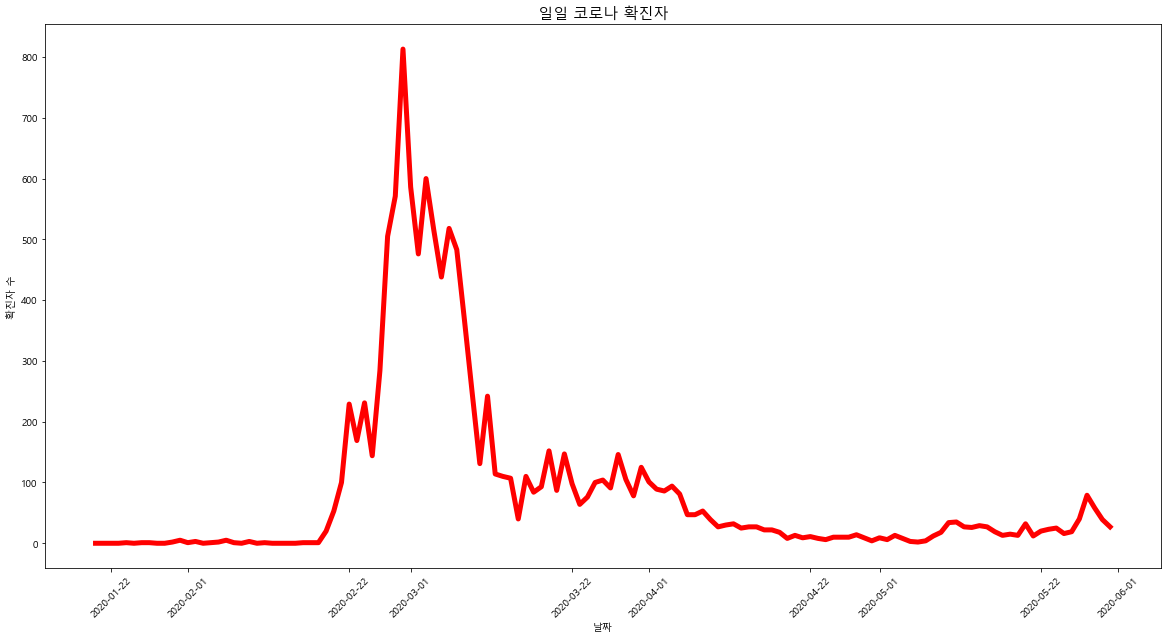

In [52]:
plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='per_day_confirmed', data=corona_data, linewidth=5, color='red')
plt.title("일일 코로나 확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("확진자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 신천지 시기가 피크

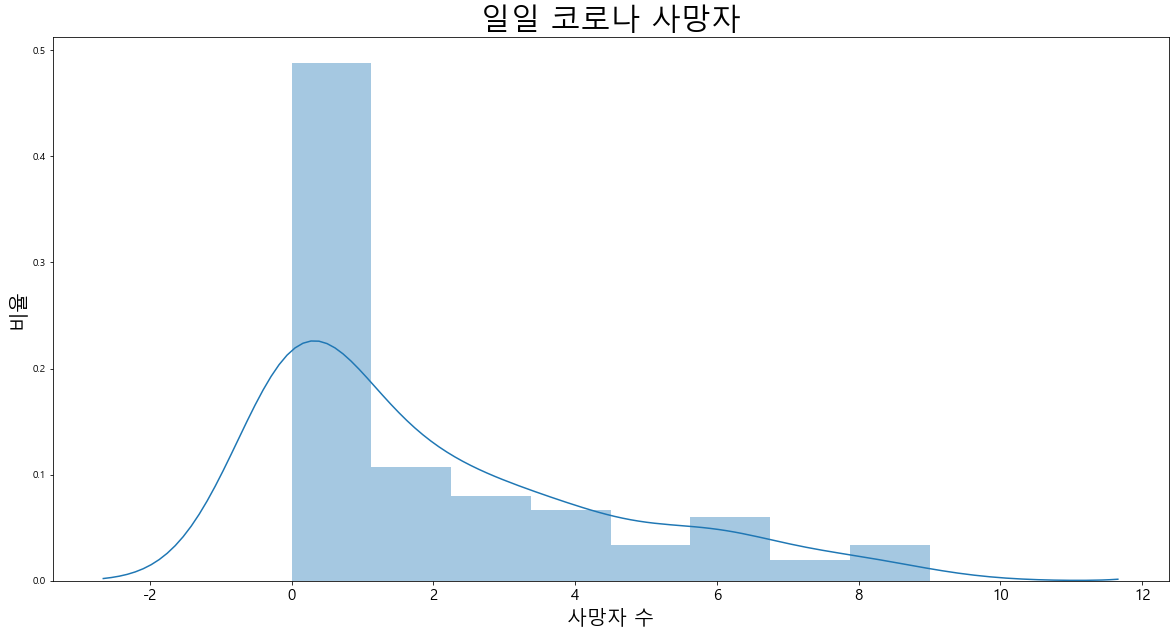

In [53]:
plt.figure(figsize=(20,10))

sns.distplot(corona_data['per_day_deceased'])
plt.title("일일 코로나 사망자", fontsize=30)
plt.xlabel("사망자 수", fontsize=20)
plt.ylabel("비율", fontsize=20)
plt.xticks(fontsize=15)
plt.show()

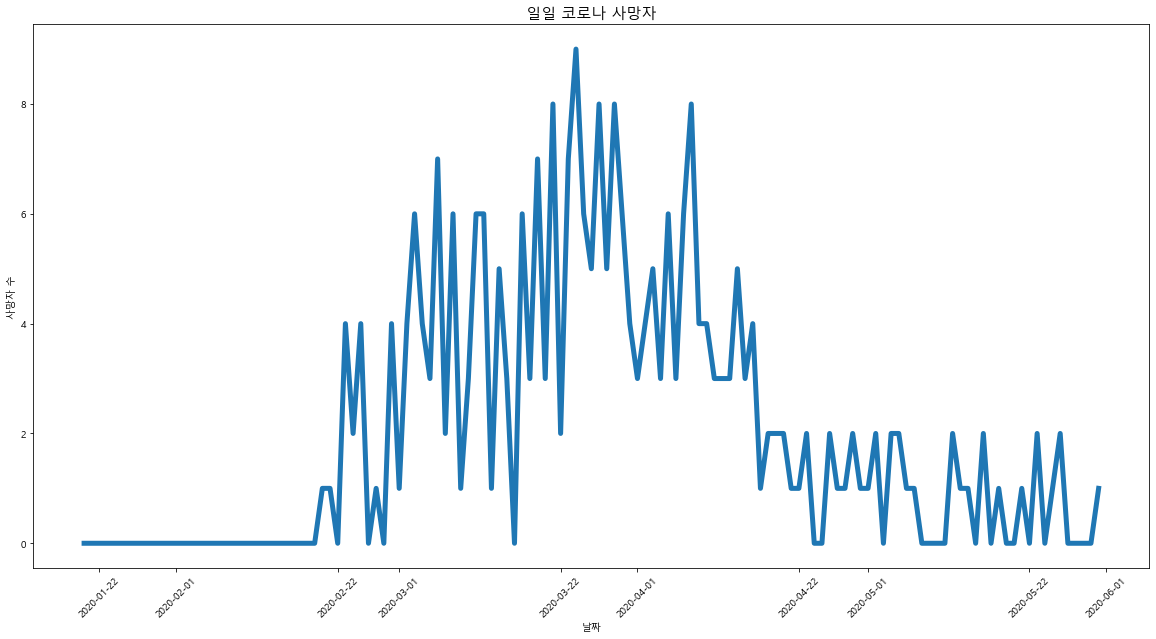

In [54]:
plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='per_day_deceased', data=corona_data, linewidth=5)
plt.title("일일 코로나 사망자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("사망자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 신천지 시기가 피크

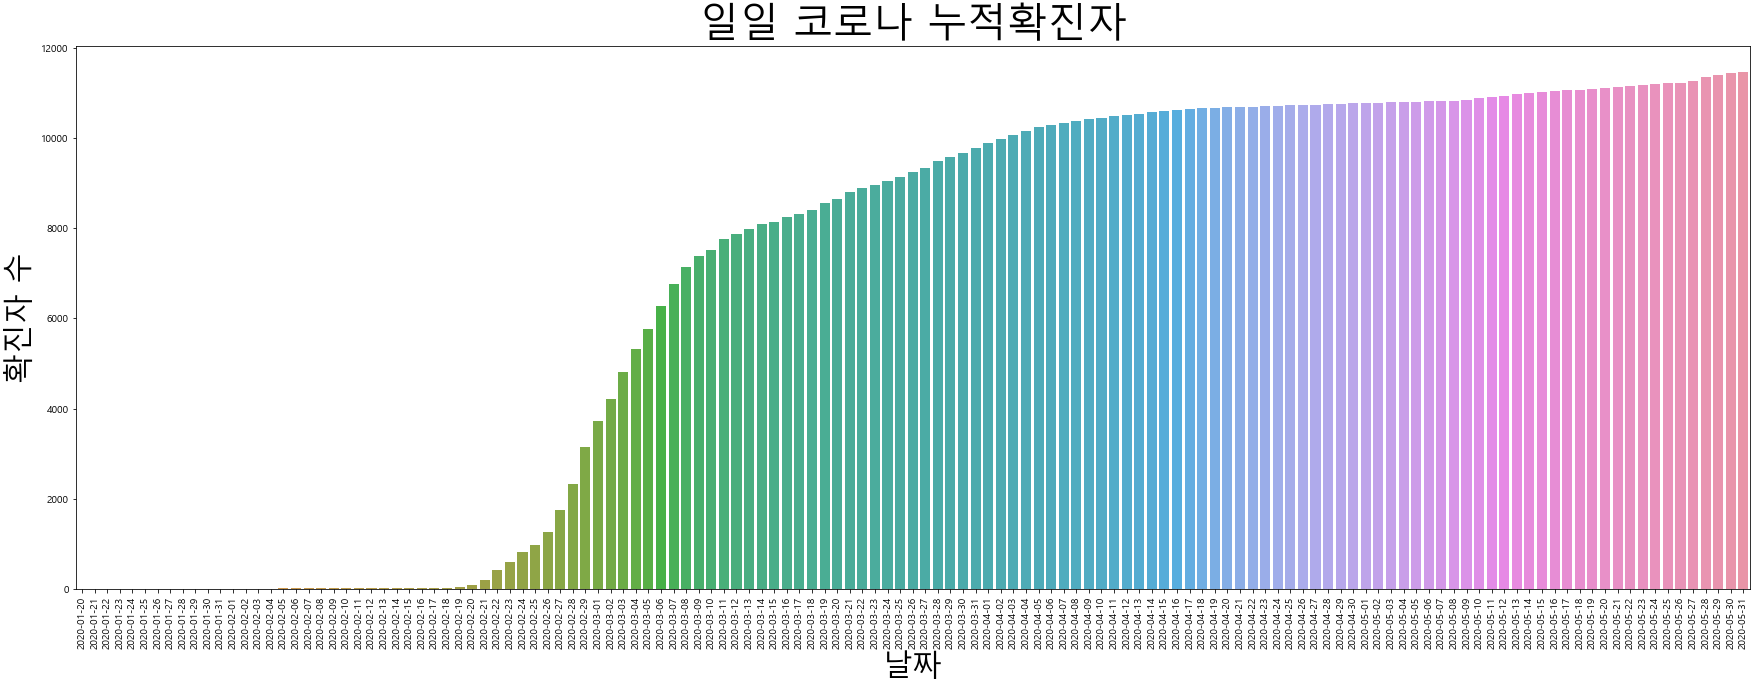

In [55]:
# 누적으로 볼까?
plt.figure(figsize=(30,10))

sns.barplot(x=corona_data['date'].astype(str), y='confirmed', data=corona_data)
plt.title("일일 코로나 누적확진자", fontsize=40)
plt.xlabel("날짜", fontsize=30)
plt.ylabel("확진자 수", fontsize=30)
plt.xticks(rotation=90, fontsize=10)
plt.show()


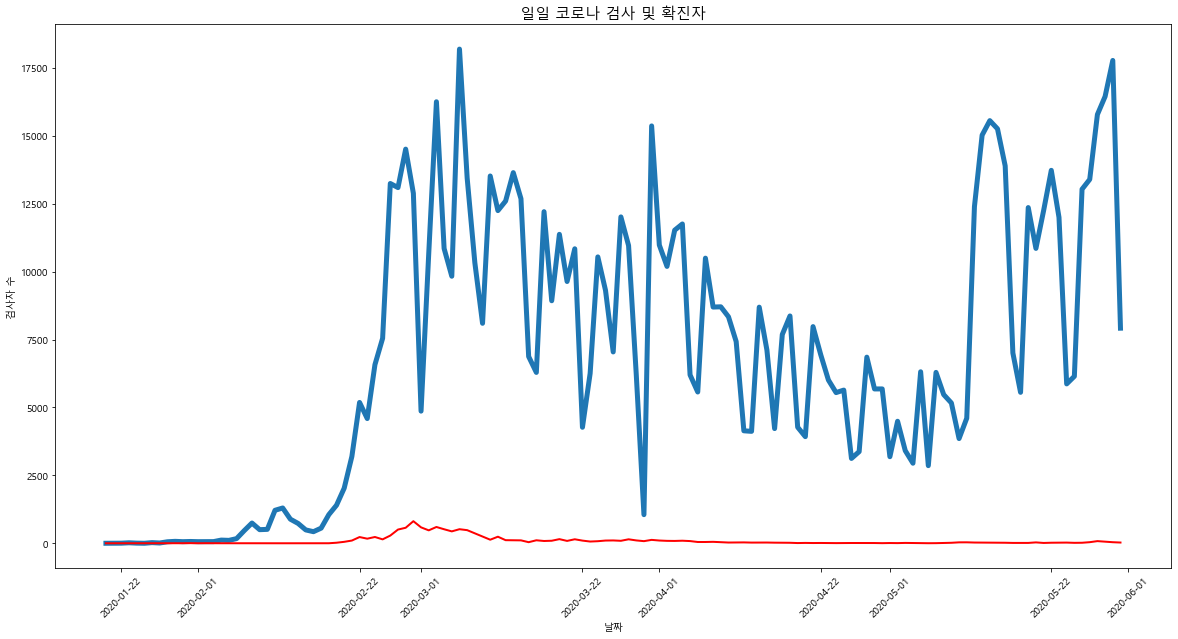

In [56]:
## 검사자 확인

plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='per_day_test', data=corona_data, linewidth=5)
sns.lineplot(x='date', y='per_day_confirmed', data=corona_data, linewidth=2, color='red')
plt.title("일일 코로나 검사 및 확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("검사자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 후반부에 검사자가 많은 것에 비해 확진자는 적음
# 중간중간에 떨어지는 것은 주말로 파악
# 

## Suggestion
- 확진자가 급격히 늘어날 때의 배달건수 증가 추세 비교
- 검사자가 급격히 늘어날 때의 배달건수 증가 추세 비교
- 사망자가 급격히 늘어날 때의 배달건수 증가 추세 비교

# ===================================================
# ===================================================
# ===================================================
# ===================================================

In [57]:
# 시간 및 지역별 감염자 정보
covid_df2 = pd.read_csv("./data/covid_19_dataset/TimeProvince.csv")
display(covid_df2.head(3))
# 날짜 / 시간 / 광역시도 / 확진 / 완치 / 사망

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0


In [58]:
print(covid_df2['time'].unique()) # 아마 코로나 현황 발표 시간인 듯 하다 // 중요하지 않음
covid_df2.drop("time", axis=1, inplace=True) # 타임컬럼 제거

[16  0]


In [59]:
# 전체 데이터는 1월에서 20일이다
# 코로나 확산 시 8월 사랑제일교회 전까지는 지방에서 확진자가 많이 나왔다.
# 예컨대 2월 18일부터 4월 29일까지 신천지 사태가 있었고, 해당 시기에 확진자 및 영향력이 가장 컸다.
# 때문에 서울과 경기를 중심으로 보되, 해당 데이터에 한정하여 대구도 파악한다.

In [60]:
covid_df2['date'] = pd.to_datetime(covid_df2['date'])
covid_df2['date'].max() # 6월 30일 ==> 배달데이터는 5월 31일까지 존재한다.

covid_df2 = covid_df2[covid_df2['date'] < '2020-06-01']

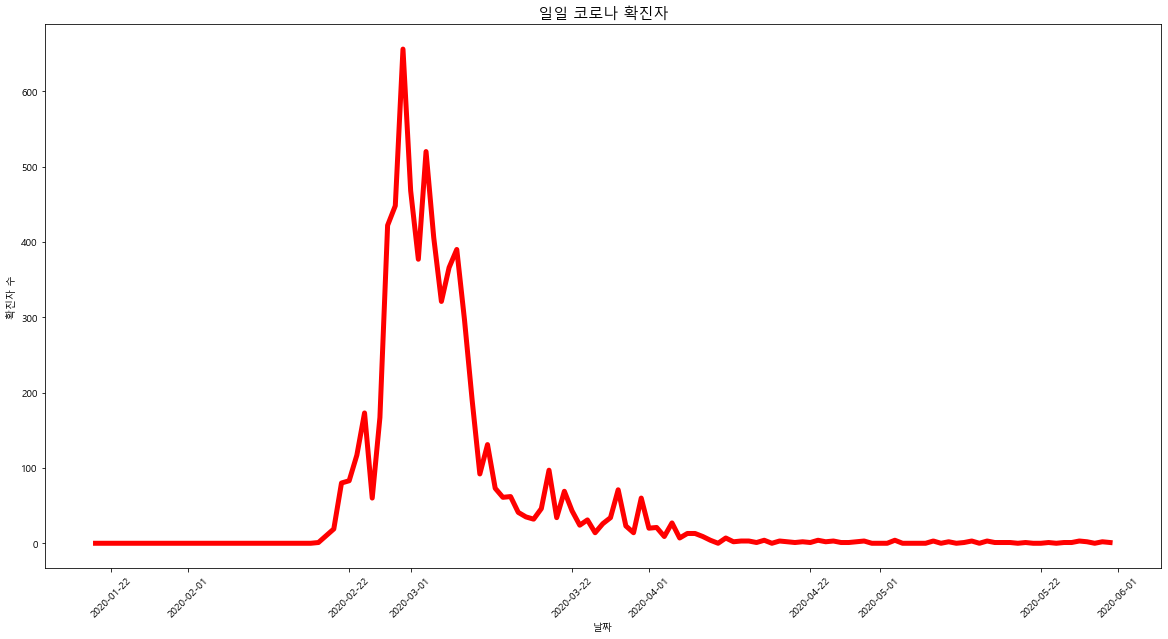

In [61]:
# 대구를 중심으로 봐봅시다.
daegu = covid_df2[covid_df2['province']=='Daegu']

per_day_test = [0]
per_day_confirmed = [0]
per_day_released = [0]
per_day_deceased = [0]

for x in range(len(daegu)-1) :
    per_day_confirmed.append(daegu['confirmed'].iloc[x+1] - daegu['confirmed'].iloc[x])
    per_day_released.append(daegu['released'].iloc[x+1] - daegu['released'].iloc[x])
    per_day_deceased.append(daegu['deceased'].iloc[x+1] - daegu['deceased'].iloc[x])
    
daegu['per_day_confirmed'] = per_day_confirmed
daegu['per_day_released'] = per_day_released
daegu['per_day_deceased'] = per_day_deceased

plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='per_day_confirmed', data=daegu, linewidth=5, color='red')
plt.title("대구 일일 코로나 확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("확진자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 사실상 2~3월은 전국 데이터와 일치
# 5월 이후에 차이

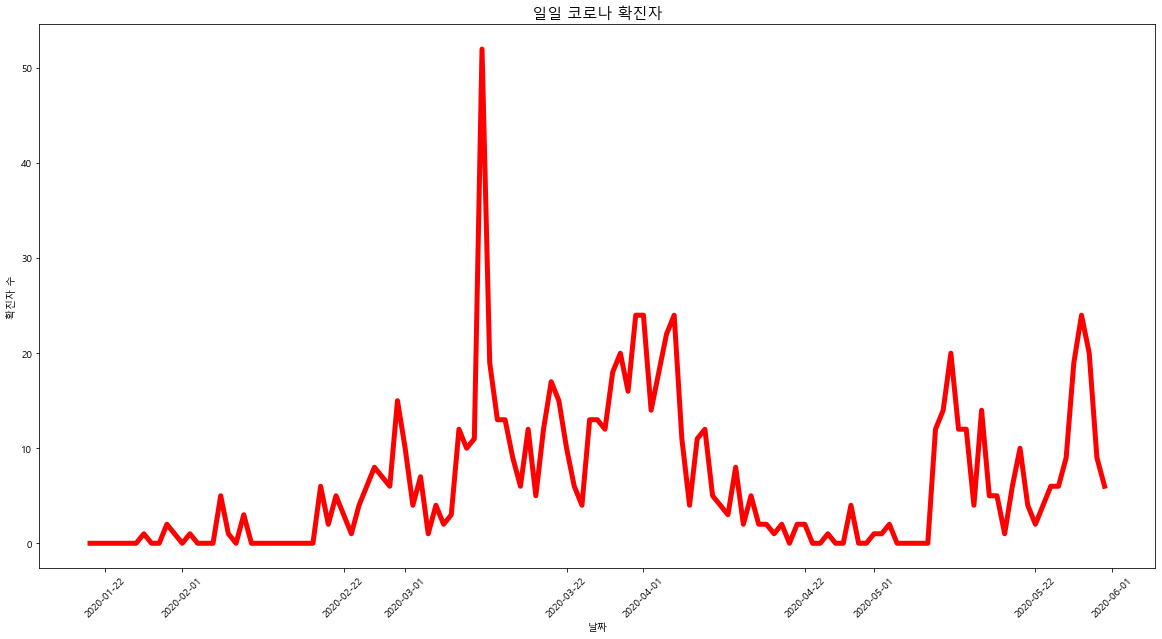

In [62]:
# 서울을 중심으로 봐봅시다.
seoul = covid_df2[covid_df2['province']=='Seoul']

per_day_test = [0]
per_day_confirmed = [0]
per_day_released = [0]
per_day_deceased = [0]

for x in range(len(seoul)-1) :
    per_day_confirmed.append(seoul['confirmed'].iloc[x+1] - seoul['confirmed'].iloc[x])
    per_day_released.append(seoul['released'].iloc[x+1] - seoul['released'].iloc[x])
    per_day_deceased.append(seoul['deceased'].iloc[x+1] - seoul['deceased'].iloc[x])
    
seoul['per_day_confirmed'] = per_day_confirmed
seoul['per_day_released'] = per_day_released
seoul['per_day_deceased'] = per_day_deceased

plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='per_day_confirmed', data=seoul, linewidth=5, color='red')
plt.title("서울 일일 코로나 확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("확진자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 3월 중반에 갑자기 늘어남
# 대체로 전부 50명대 이하
# 현재 서울이 가장 많은 것과 다름


In [63]:
# 도대체 50명을 찍은 날엔 무슨 일이 있었을까
check = seoul[seoul['per_day_confirmed'] > 50]
check # 3월 11일
# 2020년 3월 11일, 세계보건기구(WHO)는 코로나바이러스감염증-19(코로나19)의 확산을 세계적 대유행(팬데믹)으로 선포

,date,province,confirmed,released,deceased,per_day_confirmed,per_day_released,per_day_deceased
867,2020-03-11,Seoul,193,37,0,52,6,0


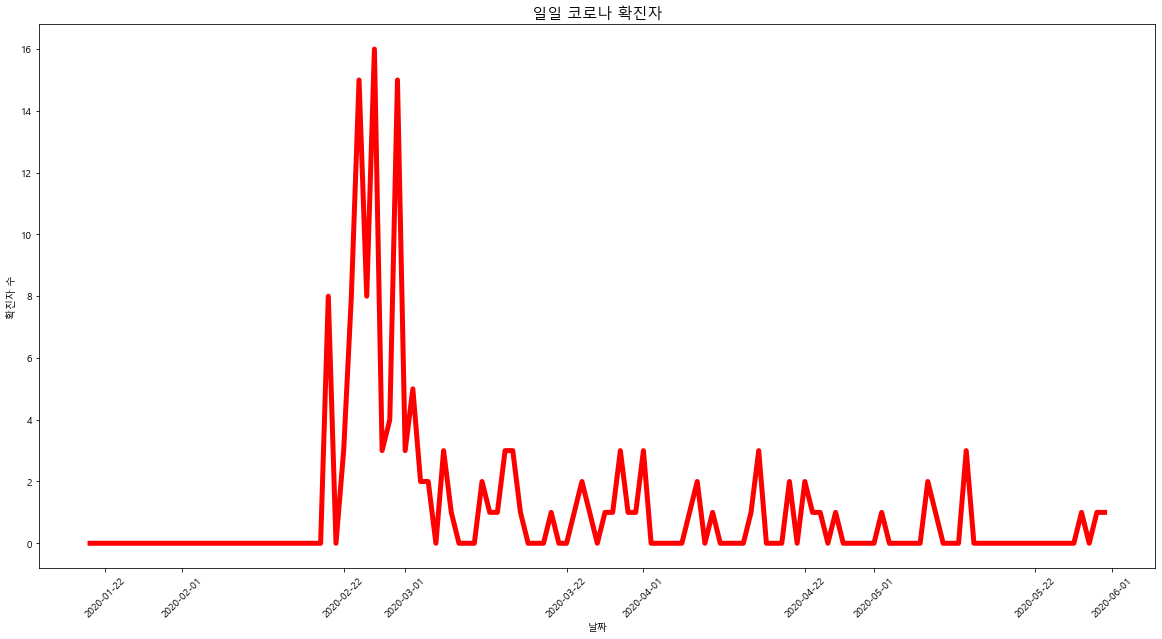

In [64]:
# 대구와 가까웠던 부산
busan = covid_df2[covid_df2['province']=='Busan']

per_day_test = [0]
per_day_confirmed = [0]
per_day_released = [0]
per_day_deceased = [0]

for x in range(len(busan)-1) :
    per_day_confirmed.append(busan['confirmed'].iloc[x+1] - busan['confirmed'].iloc[x])
    per_day_released.append(busan['released'].iloc[x+1] - busan['released'].iloc[x])
    per_day_deceased.append(busan['deceased'].iloc[x+1] - busan['deceased'].iloc[x])
    
busan['per_day_confirmed'] = per_day_confirmed
busan['per_day_released'] = per_day_released
busan['per_day_deceased'] = per_day_deceased

plt.figure(figsize=(20,10))

sns.lineplot(x='date', y='per_day_confirmed', data=busan, linewidth=5, color='red')
plt.title("부산 일일 코로나 확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("확진자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

## 부산은 딱히 영향이 없다. ==> 신천지 시기 이후 늘어나긴 하나, 대구 정도는 아니다.

In [73]:
## 대구를 제외하고 어떤 그림이 그려질까
# daegu.reset_index(drop=True, inplace=True)
display(daegu.head())
display(corona_data.head())

,date,province,confirmed,released,deceased,per_day_confirmed,per_day_released,per_day_deceased
0,2020-01-20,Daegu,0,0,0,0,0,0
1,2020-01-21,Daegu,0,0,0,0,0,0
2,2020-01-22,Daegu,0,0,0,0,0,0
3,2020-01-23,Daegu,0,0,0,0,0,0
4,2020-01-24,Daegu,0,0,0,0,0,0


,date,test,negative,confirmed,released,deceased,per_day_test,per_day_confirmed,per_day_released,per_day_deceased
0,2020-01-20,1,0,1,0,0,0,0,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,1,0,0


In [80]:
except_daegu_confirmed = []
except_daegu_released = []
except_daegu_deceased = []

for x in range(len(corona_data)) :
    except_daegu_confirmed.append(corona_data['per_day_confirmed'].iloc[x] - daegu['per_day_confirmed'].iloc[x])
    except_daegu_released.append(corona_data['per_day_released'].iloc[x] - daegu['per_day_released'].iloc[x])
    except_daegu_deceased.append(corona_data['per_day_deceased'].iloc[x] - daegu['per_day_deceased'].iloc[x])
    
date_list = daegu['date'].to_list()

except_daegu_df = pd.DataFrame([date_list, except_daegu_confirmed, except_daegu_released, except_daegu_deceased]).T
except_daegu_df.columns = ['date', 'per_day_confirmed', 'per_day_released', 'per_day_deceased']

In [83]:
except_daegu_df['per_day_confirmed'] = except_daegu_df['per_day_confirmed'].astype(int)
except_daegu_df['per_day_released'] = except_daegu_df['per_day_released'].astype(int)
except_daegu_df['per_day_deceased'] = except_daegu_df['per_day_deceased'].astype(int)

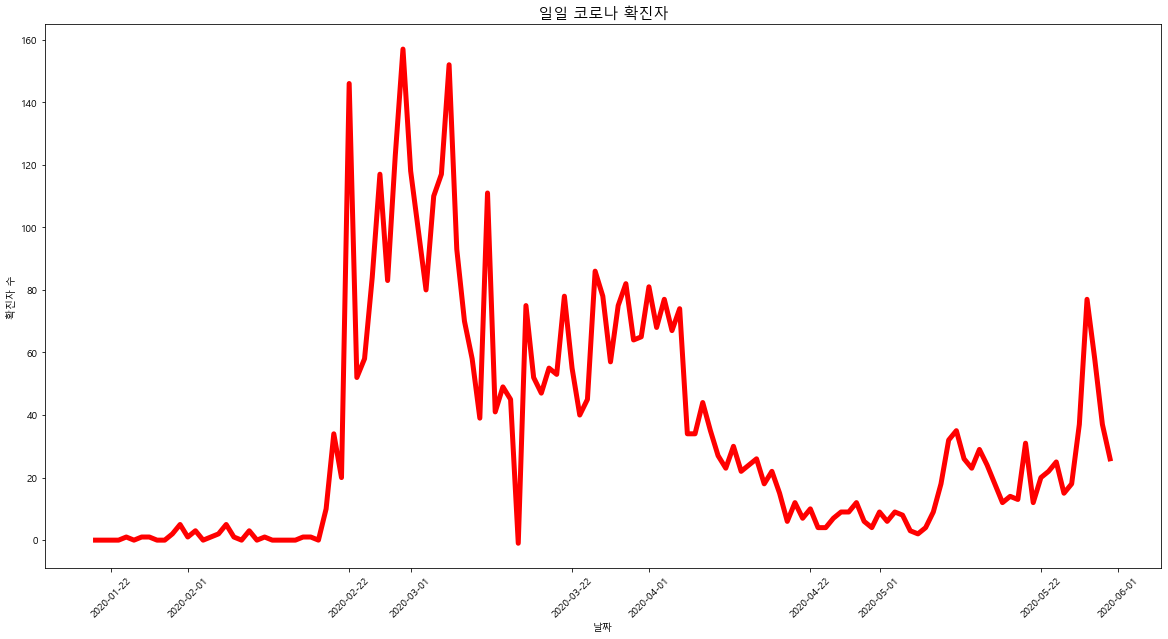

In [84]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date', y='per_day_confirmed', data=except_daegu_df, linewidth=5, color='red')
plt.title("일일 코로나 확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("확진자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# ===================================================
# ===================================================
# ===================================================
# ===================================================

In [66]:
# 날씨 정보
covid_df3 = pd.read_csv("./data/covid_19_dataset/Weather.csv")
display(covid_df3.head(3))
# 번호 / 광역시도 / 날짜 / 일일평균온도 /일일최저온도 / 일일최대온도 / 강수량 / 최대풍속 / 최빈풍향 / 습도

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
